In [2]:
import numpy as np
import scipy as scipy
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
import gzip
from sklearn.preprocessing import OneHotEncoder
from scipy.special import expit
import celluloid
from celluloid import Camera
from matplotlib import animation
from IPython.display import HTML
from matplotlib.lines import Line2D

np.random.seed(2022)

In [8]:
def lplot(Ys,labels=['1','2','3','4','5','6'],ylabel='Function value'):
    """Line plot of the Y values. (Same as above, but no animation).
    Ys is a list where each element is an array of numbers to plot.
    """
    colors = ['blue','red','green','black','cyan','purple','pink']
    fig, ax = plt.subplots(figsize=(6,6))
    T = len(Ys[0])
    #plt.yscale('log')
    handles = []
    for i in range(len(Ys)):
        handles.append(Line2D([0], [0], color=colors[i], label=labels[i]))
    plt.legend(handles = handles, loc = 'upper right')
    plt.xlabel('Step')
    plt.ylabel(ylabel)
    for j in range(len(Ys)):
        plt.plot(range(T),Ys[j][:T],color=colors[j],marker='o')

In [5]:
def gen_rank_k_matrix(n,d,k):
    U = np.random.normal(0,1,(n,k))
    V = np.random.normal(0,1,(k,d))
    X = U.dot(V)
    if np.linalg.matrix_rank(X) == k:
        return X
    else:
        return gen_rank_k_matrix(n,d,k)
    
def gen_mask(n,d,p):
    R = np.random.rand(n,d)
    O = np.zeros((n,d))
    O[R < p] = 1
    return O

def cost(X,Y,O):
    return np.sum((X - Y)**2)

def gradient_fn(X,Y,O):
    return 2*(Y*O - X)

def gradient_descent(xinit,steps,gradient):
    """Run gradient descent.
    Return an array with the rows as the iterates.
    """
    xs = [xinit]
    x = xinit
    for step in steps:
        x = x - step*gradient(x)
        u, s, vT = scipy.sparse.linalg.svds(x, k=5)
        x = u.dot(np.diag(s).dot(vT))
        xs.append(x)
    return np.array(xs)

In [6]:
n = 1000
d = 500
k = 5
p = 0.1
num_iter = 1000
X = gen_rank_k_matrix(n,d,k)
X_init = gen_rank_k_matrix(n,d,k)
O = gen_mask(n,d,p)
X_in = X*O
objective = lambda Y: cost(X, Y, O) 
gradient = lambda Y: gradient_fn(X_in, Y, O) 
step_sizes = [0.1,0.2,0.3]
labels = ['Stepsize is '+str(step) for step in step_sizes]
Xs = [gradient_descent(X_init,[size]*num_iter,gradient) for size in step_sizes]
Ys = [[objective(y) for y in x] for x in Xs]

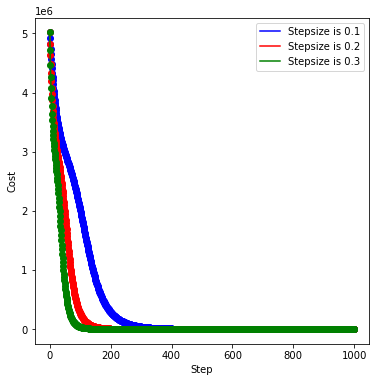

In [9]:
lplot(Ys,labels,'Cost')